In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = './Sales.csv'
df = pd.read_csv(url)
df.head()

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe

<bound method NDFrame.describe of       Id     TV  Radio  Newspaper  Sales
0      1  230.1   37.8       69.2   22.1
1      2   44.5   39.3       45.1   10.4
2      3   17.2   45.9       69.3    9.3
3      4  151.5   41.3       58.5   18.5
4      5  180.8   10.8       58.4   12.9
..   ...    ...    ...        ...    ...
195  196   38.2    3.7       13.8    7.6
196  197   94.2    4.9        8.1    9.7
197  198  177.0    9.3        6.4   12.8
198  199  283.6   42.0       66.2   25.5
199  200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

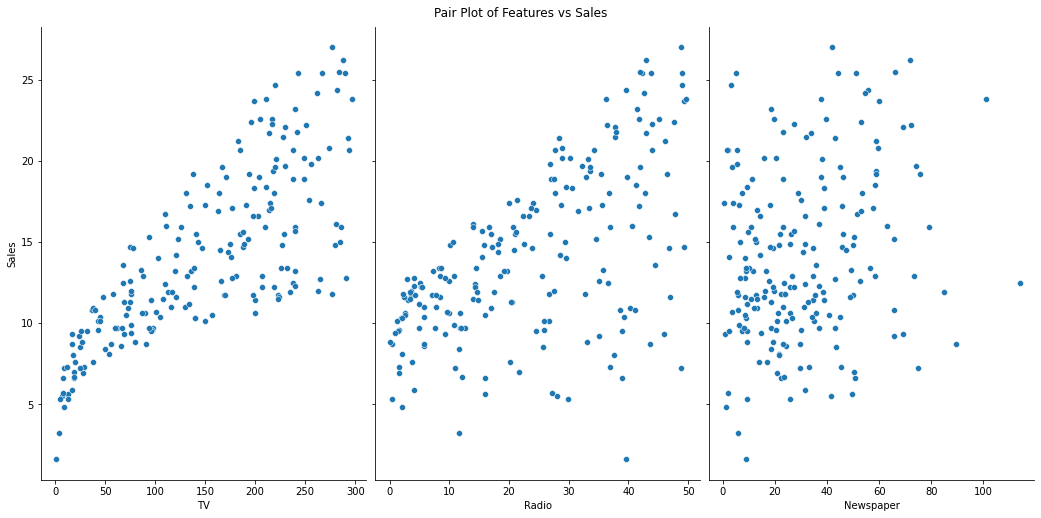

In [7]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7)
plt.suptitle('Pair Plot of Features vs Sales', y=1.02)
plt.show()

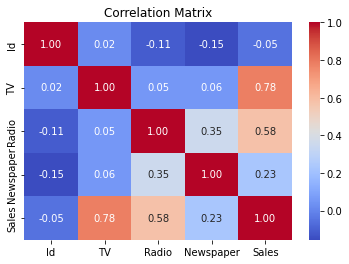

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [16]:
res = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
res.head()

,Actual Sales,Predicted Sales
86,12.0,11.604043
15,22.4,20.816565
134,10.8,11.871283
5,7.2,12.515718
72,8.8,10.377648


In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error: ',mse)
print('R-squared: ',r2)

Mean Squared Error:  2.249199837596893
R-squared:  0.8880425570920085


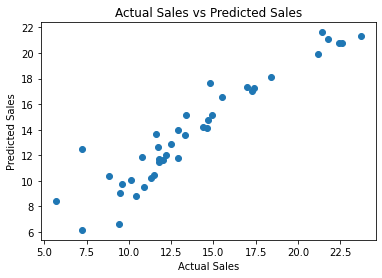

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

In [19]:
res['Difference'] = res['Actual Sales'] - res['Predicted Sales']


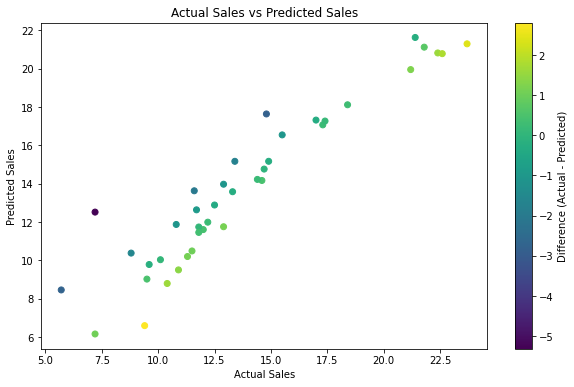

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(res['Actual Sales'], res['Predicted Sales'], c=res['Difference'], cmap='viridis')
plt.colorbar(scatter, label='Difference (Actual - Predicted)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()